Create database

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

import engarde.decorators as ed

import toolbox.toolbox as tb

pd.set_option('display.max_colwidth', None)


data = 'Schweizer-Nährwertdatenbank-V6.1.xlsx'
foods = tb.read(data)


my_foods = {
    'avocado, roh': 'avocado',
    'blattsalat (durchschnitt), roh': 'lettuce',
    'champignon, roh': 'mushrooms',    
    'fleisch (durchschnitt exkl. innereien), roh': 'meat',
    'gemüse (durchschnitt), roh': 'vegetables',
    'hart- und halbhartkäse, vollfett (durchschnitt)': 'cheese',
    'hühnerei, ganz, festgekocht': 'eggs',
    'kakaopulver': 'cocoa powder', 
    'kochbutter': 'butter',
    'kokosfett': 'coconut fat',
    'kokosnuss, getrocknet (kokosrapseln, kokosflocken)': 'coconut flakes',
    'mandel': 'almond',
    'olivenöl': 'olive oil',
    'peperoni, rot, roh': 'red pepper',
    'poulet, schenkel, mit haut, gebraten (ohne zusatz von fett und salz)': 'chicken leg',
    'poulet, brust, schnitzel oder geschnetzeltes, gebraten (ohne zusatz von fett und salz)': 'chicken breast',
    'samen, kerne, nüsse (durchschnitt), ungesalzen': 'nuts and seed mix',
    'schwein, hals, steak, gebraten (ohne zusatz von fett und salz)': 'pork steak',
    'spinat, roh': 'spinach', 
    'tofu': 'tofu',
}

myfoods = tb.make_myfoods(foods, my_foods)
myfoods.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 33 to 907
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       20 non-null     object 
 1   category   20 non-null     object 
 2   units      20 non-null     object 
 3   calories   20 non-null     int64  
 4   fat        20 non-null     float64
 5   carbs      20 non-null     float64
 6   fiber      20 non-null     float64
 7   protein    20 non-null     float64
 8   net_carbs  20 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.6+ KB


Find items

In [3]:
tb.find_item(foods, 'hühnere')

,name,category,units,calories,fat,carbs,fiber,protein,net_carbs
315,"hühnerei, ganz, festgekocht",eier,pro 100g essbarer Anteil,157,11.4,0.3,0.0,13.2,0.3
316,"hühnerei, ganz, roh",eier,pro 100g essbarer Anteil,142,10.3,0.3,0.0,11.9,0.3
317,"hühnereigelb, roh (eidotter)",eier,pro 100g essbarer Anteil,350,31.5,0.2,0.0,16.5,0.2
318,"hühnereiweiss, roh (eiklar)",eier,pro 100g essbarer Anteil,44,0.1,0.3,0.0,10.5,0.3


Define meals

In [6]:
lunch = {
    'lettuce': 2,
    'avocado': 1.5,
    'olive oil': .2,
    'red pepper': 1,
    'eggs': 2, 
    'nuts and seed mix': .5,
    'cheese': 0,
}

supper = {
    'vegetables': 0,
    'avocado': 1.5,
    'butter': .2,
    'pork steak': 0,
    'cheese': 0
}

meals = [lunch, supper]

Calc nuts for each meal and for day

In [7]:
def calc_nutrients(data, meal):
    
    nutrients = ['calories', 'fat', 'protein', 'net_carbs']
    
    data = data.loc[data.name.isin(meal), nutrients].sum()
    
    grams = data[1:].copy()
    grams['total'] = grams.sum()
    
    cals = data[1:].copy()
    cals['fat'] = grams.fat * 9
    cals['protein'] = grams.protein * 4
    cals['net_carbs'] = grams.net_carbs * 4
    cals['total'] = data['calories']
    
    nuts = pd.concat([grams, cals], axis=1)
    nuts = nuts.reindex(['total', 'fat', 'protein', 'net_carbs'])
    nuts[nuts < 0] = 0
    nuts.columns = ['grams', 'cals']
    
    return nuts

    
meal_nuts = [calc_nutrients(myfoods, meal) for meal in meals]    
meal_nuts.append(sum(meal_nuts))

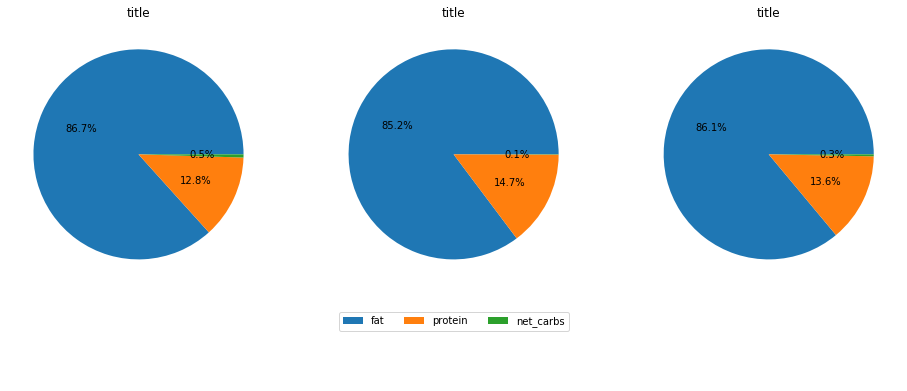

In [56]:

def print_stats(data):

    def make_doughnut(data, axis, title):
        nuts = data[1:]
        ax[axis].pie(nuts.cals, autopct='%2.1f%%')
        ax[axis].set_title(title)


    fig, ax = plt.subplots(1, len(meal_nuts), figsize=(16, 8))

    for meal_num, meal in enumerate(meal_nuts):
        make_doughnut(meal, meal_num, 'title')

    fig.legend(meal_nuts[0].index[1:], loc='lower center', borderaxespad=6, ncol=3);
    
print